# Performance Analysis of OpenMP with Cantera

---

>"**report_time.csv**" file contains the execution time for different values of *Threads* and *Package sizes*.

In [1]:
import pandas as pd

df = pd.read_csv("report_time.csv")
df["total_time[s]"] = df["read_time[s]"] + df["calc_time[s]"] + df["write_time[s]"]
df

,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s]
0,1,5,55076,0.670609,563.370,0.949715,564.990324
1,1,10,55076,0.653276,563.092,0.944177,564.689453
2,1,15,55076,0.655501,562.006,0.941386,563.602887
3,1,20,55076,0.648578,561.914,0.945217,563.507795
4,1,25,55076,0.645982,561.662,0.949270,563.257252
...,...,...,...,...,...,...,...
115,32,80,55076,0.649529,112.754,0.948711,114.352240
116,32,85,55076,0.646358,113.022,0.955529,114.623887
117,32,90,55076,0.651376,112.456,0.943477,114.050853
118,32,95,55076,0.646021,112.975,0.948980,114.570001


---

>Next processing generate a *mesh grid*. The goal is visualize execution time for different *threads* and *package sizes* at the same time.

In [2]:
import numpy as np

threads=np.array([1,2,4,8,16,32])
packages=np.array(range(5,105,5))

m = threads.size
n = packages.size

time_mat = np.zeros([m,n])


for i in range(m):
    t = threads[i]
    for j in range(n):
        pack = packages[j]
        time_mat[i,j] = df[(df["threads"]==t) & (df["package"]==pack)].iloc[0,6]

x, y = np.meshgrid(packages,threads)

print(time_mat)

[[564.990324 564.689453 563.602887 563.507795 563.257252 567.348884
  566.679903 565.972371 563.931938 562.586902 566.696799 565.120384
  566.297586 565.352592 566.064123 563.506679 568.966247 563.699327
  562.182807 565.572136]
 [310.781935 312.286921 310.942884 314.001813 309.904486 315.885435
  310.697373 311.34645  312.806553 312.644245 309.498782 310.628921
  310.312532 310.606181 311.283371 309.756419 309.978529 309.334745
  310.613386 310.616055]
 [177.694928 179.65331  178.114928 178.410672 177.247289 177.318414
  177.675206 179.772135 176.881424 177.412945 177.849963 179.69739
  180.484016 178.593561 177.703517 179.797351 178.962587 179.104136
  180.261011 177.892061]
 [108.743866 110.339188 108.773748 108.979997 111.140969 111.190473
  110.213269 110.883652 110.291674 110.194257 111.488159 110.291318
  110.301376 109.961194 109.866208 109.491962 110.753118 109.940782
  109.655176 111.322677]
 [102.923969 102.616974 103.515912 102.353564 103.790989 101.009741
  101.157668 102.

---

## Heat map visualization

>Results indicate that *package* size has no influence in performance. In addition, best performance is obtained with 16 threads instead of 32 (16 real processors and 32 logical in the machine where the program run).

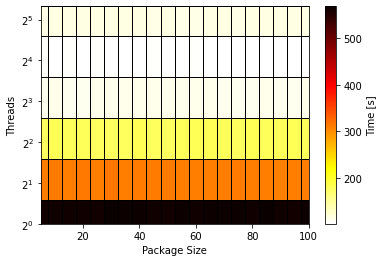

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

heat_map = ax.pcolormesh(x,y,time_mat, cmap="hot_r",edgecolors="black")

cbar = fig.colorbar(heat_map, ax=ax)
cbar.set_label("Time [s]")

#ax.set_ylim(1,32)
ax.set_ylim(1)
ax.set_xlim(5,100)
ax.set_xlabel("Package Size")
ax.set_ylabel("Threads")

ax.set_yscale("log",base=2)
#plt.yscale("log",base=2)

plt.show()

---

## Package size influence for 16 threads

>With this line chart we can confirm that, in the way this code is written, package size has no effect in performance

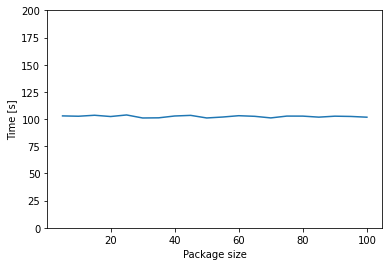

In [4]:
sixteen = df[df["threads"]==16]

fig, ax = plt.subplots()

ax.plot(sixteen["package"], sixteen["total_time[s]"])

ax.set_ylim(0,200)
ax.set_xlabel("Package size")
ax.set_ylabel("Time [s]")

plt.show()

---

## Best execution time

>Analysis of the best performance execution

In [5]:
best_conf = df[df["total_time[s]"] == df["total_time[s]"].min()]
best_conf

,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s]
85,16,30,55076,0.647573,99.4128,0.949368,101.009741


In [6]:
worse_conf = df[df["total_time[s]"] == df["total_time[s]"].max()]
worse_conf

,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s]
16,1,85,55076,0.645723,567.374,0.946524,568.966247


[0.11349056 0.64109955]


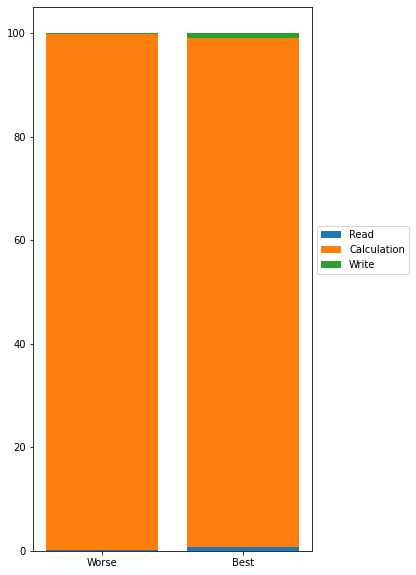

In [7]:
b_tot = best_conf["total_time[s]"].iloc[0]
b_read = best_conf["read_time[s]"].iloc[0]
b_calc = best_conf["calc_time[s]"].iloc[0]
b_write = best_conf["write_time[s]"].iloc[0]

w_tot = worse_conf["total_time[s]"].iloc[0]
w_read = worse_conf["read_time[s]"].iloc[0]
w_calc = worse_conf["calc_time[s]"].iloc[0]
w_write = worse_conf["write_time[s]"].iloc[0]

x = ["Worse", "Best"]

read_per = np.array([w_read/w_tot*100, b_read/b_tot*100])
calc_per = np.array([w_calc/w_tot*100, b_calc/b_tot*100])
write_per = np.array([w_write/w_tot*100, b_write/b_tot*100])
print(read_per)

fig, ax = plt.subplots()

fig.set_size_inches(5,10)

ax.bar(x, read_per, label="Read")
ax.bar(x, calc_per, bottom=read_per, label="Calculation")
ax.bar(x, write_per, bottom=read_per+calc_per, label="Write")
ax.legend(loc="lower left",bbox_to_anchor=(1.0,0.5))

plt.show()

>Due to read and write executions are secuential, results times in both executions (*best* and *worse*) are similar (but relatively, *best*'s read and write times are greater than *worse*). Even so, both can be ignored comparing with calculation time.

---

## Speed up

> Results are worse than expected, the code has to be improved in order to gain better performance. Mesh points have no dependency on each other, so the parallelization should be almost ideal.

In [8]:
serial_time = df[(df["threads"]==1) & (df["package"]==5)].iloc[0,6]
print("Serial Time: ", serial_time, "s")

df["speedup"] = serial_time / df["total_time[s]"]
df

Serial Time:  564.990324 s


,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s],speedup
0,1,5,55076,0.670609,563.370,0.949715,564.990324,1.000000
1,1,10,55076,0.653276,563.092,0.944177,564.689453,1.000533
2,1,15,55076,0.655501,562.006,0.941386,563.602887,1.002462
3,1,20,55076,0.648578,561.914,0.945217,563.507795,1.002631
4,1,25,55076,0.645982,561.662,0.949270,563.257252,1.003077
...,...,...,...,...,...,...,...,...
115,32,80,55076,0.649529,112.754,0.948711,114.352240,4.940789
116,32,85,55076,0.646358,113.022,0.955529,114.623887,4.929080
117,32,90,55076,0.651376,112.456,0.943477,114.050853,4.953846
118,32,95,55076,0.646021,112.975,0.948980,114.570001,4.931398


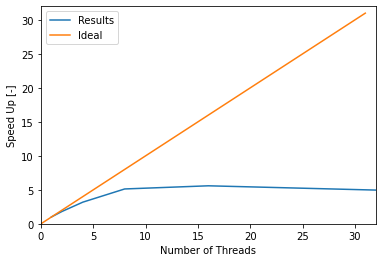

In [9]:
speedup_data = df[df["package"] == 50] # Package value does not matter

fig, ax = plt.subplots()

ax.plot(speedup_data["threads"], speedup_data["speedup"])

# Ideal parallelization
ax.plot(range(0,32), range(0,32))

ax.set_xlim(0,32)
ax.set_ylim(0,32)
ax.set_xlabel("Number of Threads")
ax.set_ylabel("Speed Up [-]")
ax.legend(["Results", "Ideal"])

plt.show()